#**Demo: K-Means Clustering Using Python**

###**Problem Definition**

Perform K-Means Clustering on a dataset containing shopping details of customers from various cities to understand how clustering segregates the data similar to each other.




###**Dataset Description**

The dataset is based on the the shopping details of customers of few cities. The data has been populated randomly and holds no such relation to any real systems data or confidential data. It has 8 dimensions or features with 200 entries.

The Attributes are:

>* CustomerID
>* CustomerGender
>* CustomerAge
>* CustomerCity
>* AnnualIncome
>* CreditScore
>* SpendingScore
>* CustomerCityID

###**Tasks to be performed**


>* Importing Required Libraries
>* Analyzing the data
>* Understanding K-Means
>* Implementing K-Means from Scratch
>* Implementing K-Means using sklearn library 

###**Importing Required Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('Shopping_CustomerData.csv')
df1.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


####**Analyzing the Data**

In [4]:
#Here, we will take only two features and top 400 entries of each feature from the dataset just to make it easy to visualize the steps.
df_new = df1[["CustomerAge","SpendingScore"]]
df_new.head()


,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [5]:
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [6]:
#Checking for Null Values
df_new.isnull().sum()

CustomerAge      0
SpendingScore    0
dtype: int64

**Lets plot these two variables and visualize them**

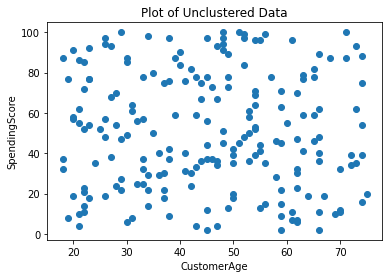

In [7]:
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.title('Plot of Unclustered Data')
plt.show()


##**Implementing K-Means using scikit learn**

In [8]:
#Here, we will take only two features and top 400 entries of each feature from the dataset just to make it easy to visualize the steps.
df = df1[["CustomerAge","SpendingScore"]]
df.head()


,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [9]:
#Here, we are assuming the value of k as 5
kmeans = KMeans(n_clusters=3)#Creating a K-Means Object
kmeans.fit(df)#Fitting the Model

KMeans(n_clusters=3)

In [10]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df)
labels

array([2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0,
       0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0,
       1, 1])

In [11]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[47.06756757, 47.05405405],
       [44.37288136, 16.72881356],
       [44.82089552, 84.65671642]])

In [12]:
#Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
kmeans.inertia_

69228.8587969452

###**Let's visualize the Clustered Data**

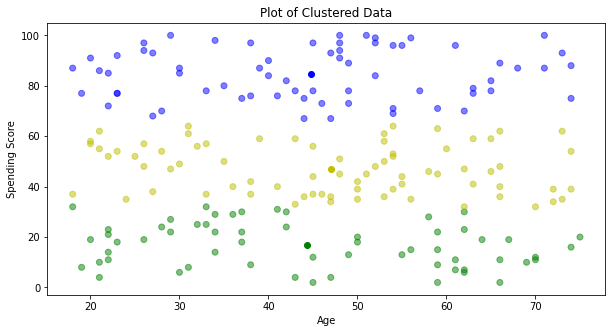

In [13]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df['CustomerAge'], df['SpendingScore'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Plot of Clustered Data')
plt.show()

###**How to determine the value of K?**

>* If we know how many classes we want to classify, then we use that value as 'k'. For Example - All of us have heard of the Iris data or even worked with it earlier. It has three classes we could classify our flowers into. So, in that case the value of k could be taken as 3.
>* If we don't know how many classes we want, then we will have to decide what the best 'k' value is. A very popular to find the value of 'k' is **Elbow Method**

###**Elbow Method**

In [14]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

In [15]:
inertia_list

[215843.51499999987,
 93076.96095008051,
 69240.592695145,
 52511.65439725441,
 38741.973716759436,
 30145.919581010017,
 25102.977346696494,
 21579.8247919673,
 19413.284003707122,
 16883.995119529587,
 14875.333587700312,
 13323.94713986135,
 12334.148865676802,
 11334.14070512821,
 10677.824712044066,
 10044.878836604576,
 9251.019491619492,
 8503.567896319366,
 8374.232616076732,
 7981.537440337437]

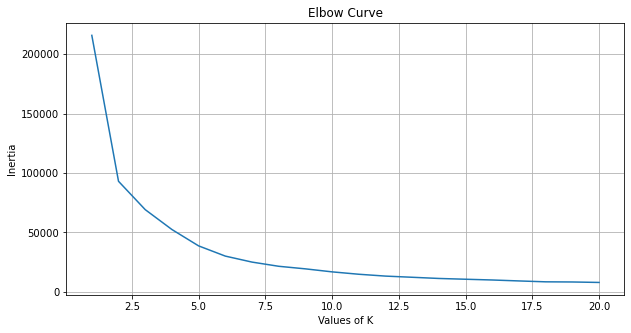

In [16]:
#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 10.**